# First look at Data

We will look at the location data-set from the [vast challenge 2015](http://vacommunity.org/2015+VAST+Challenge%3A+MC1).

This initial exploration will be accomplished using the following tools:

- [ipython notebook](http://ipython.org/)
- [Pandas](http://pandas.pydata.org/)
- [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) 
- [numpy](http://www.numpy.org/)

## 0. Setup environment

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
sns.set_style("darkgrid")

In [2]:
%cd C:\Users\Profesor\Documents\curso_va_2015\va_course_2015

C:\Users\Profesor\Documents\curso_va_2015\va_course_2015


## 1. Read the data

In [3]:
df = pd.read_csv("../MC1 2015 Data/park-movement-Fri.csv")

Let's look at the first five rows

In [4]:
df.head()

,Timestamp,id,type,X,Y
0,2014-6-06 08:00:16,1591741,check-in,63,99
1,2014-6-06 08:00:16,825652,check-in,63,99
2,2014-6-06 08:00:19,179386,check-in,63,99
3,2014-6-06 08:00:19,531348,check-in,63,99
4,2014-6-06 08:00:31,1483004,check-in,0,67


What is the size of the table?

In [5]:
df.shape

(5350348, 5)

What are the types of the data?

In [6]:
df.dtypes

Timestamp    object
id            int64
type         object
X             int64
Y             int64
dtype: object

What are the values of *type* ?

In [7]:
df["type"].unique()

array(['check-in', 'movement'], dtype=object)

In [8]:
df.groupby("type")["type"].count()

type
check-in      77771
movement    5272577
Name: type, dtype: int64

How many different ids are there?

In [9]:
df["id"].unique().shape

(3557,)

In [10]:
pd.pivot_table(df,columns="type", values="X", index="id", aggfunc=len).head()

type,check-in,movement
id,,
941,38,1999
2672,35,1934
4343,12,696
4828,27,1564
4908,24,2167


In [11]:
pd.pivot_table(df,columns="type", values="X", index="id", aggfunc=len).mean()

type
check-in      21.864211
movement    1482.310093
dtype: float64

What is the type of the timestamps?

In [12]:
type(df.Timestamp[0])

str

They are strings, it would be better if they were dats, lets fix that
with the [to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html?highlight=to_datetime#pandas.to_datetime) function

In [13]:
df["time"] = pd.to_datetime(df.Timestamp, format="%Y-%m-%d %H:%M:%S")

In [14]:
df.tail()

,Timestamp,id,type,X,Y,time
5350343,2014-6-06 20:12:07,1168815,movement,41,76,2014-06-06 20:12:07
5350344,2014-6-06 20:12:07,321318,movement,68,64,2014-06-06 20:12:07
5350345,2014-6-06 20:12:07,1687201,movement,15,42,2014-06-06 20:12:07
5350346,2014-6-06 20:12:07,580635,movement,16,40,2014-06-06 20:12:07
5350347,2014-6-06 20:12:07,973520,movement,25,67,2014-06-06 20:12:07


In [16]:
df.dtypes

Timestamp            object
id                    int64
type                 object
X                     int64
Y                     int64
time         datetime64[ns]
dtype: object

Now the *time* column contains datetime objects

## 2. Looking at location data

First, take a random subsample to speed up exploration

In [17]:
df_small = df.sample(10000)

In [18]:
df_small.shape

(10000, 6)

We will now create a simple scatter plot with all the X and Y values in our subsample

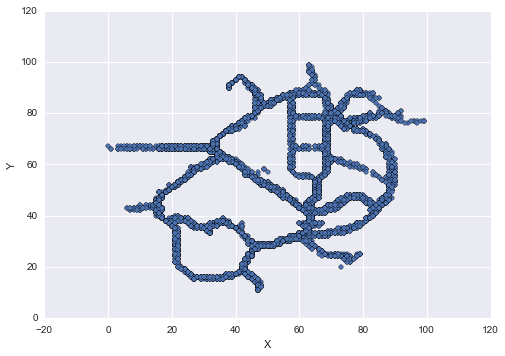

In [19]:
df_small.plot("X","Y","scatter")

It looks very similar to the pats in the map

Now lets look at just the *check-in* samples

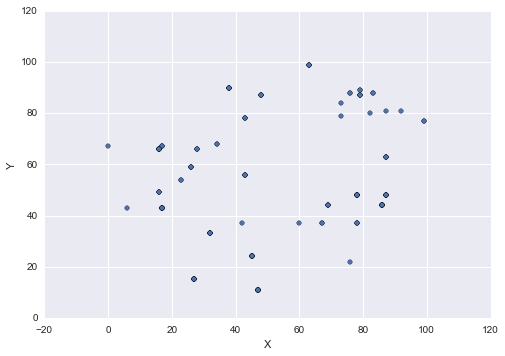

In [20]:
df_small.loc[df_small["type"]=="check-in"].plot("X","Y","scatter")

Lets look at the range of the location data

In [21]:
df["X"].min()

0

In [22]:
df["X"].max()

99

In [23]:
df["Y"].min()

11

In [24]:
df["Y"].max()

99

Now lets create a 2d histogram to see which locations are more popular. We will use the [hist2d](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist2d) function

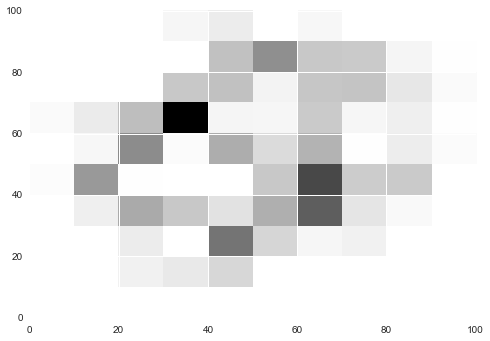

In [25]:
cnts, xe, ye, img = plt.hist2d(df_small["X"], df_small["Y"],range=((0,100),(0,100)),normed=True)

We can increase the number of bins

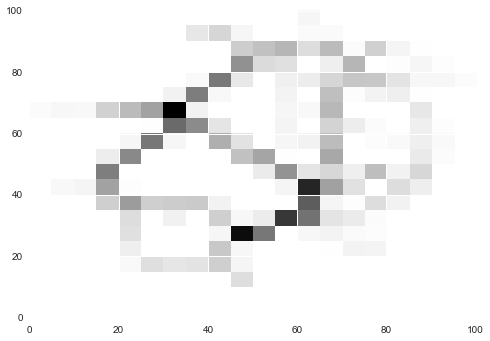

In [26]:
cnts, xe, ye, img = plt.hist2d(df_small["X"], df_small["Y"],range=((0,100),(0,100)),normed=True, bins=20)

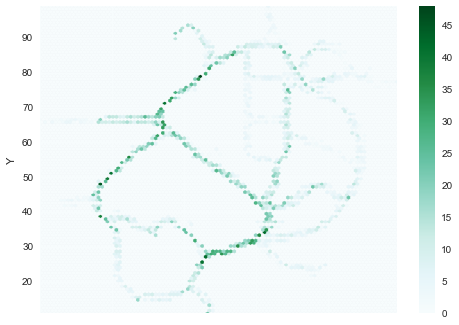

In [27]:
df_small.plot("X","Y","hexbin")

## 3. Single guest

Now lets plot the locations for a single random person

In [28]:
guest_id = np.random.choice(df["id"])

In [29]:
guest_df = df.loc[df["id"]==guest_id]

In [30]:
guest_df.shape

(1155, 6)

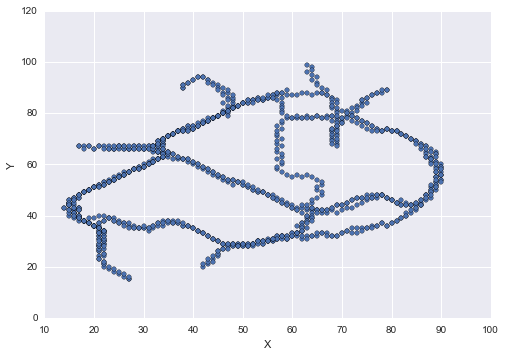

In [31]:
guest_df.plot("X","Y","scatter")

Now lets try to use the time information

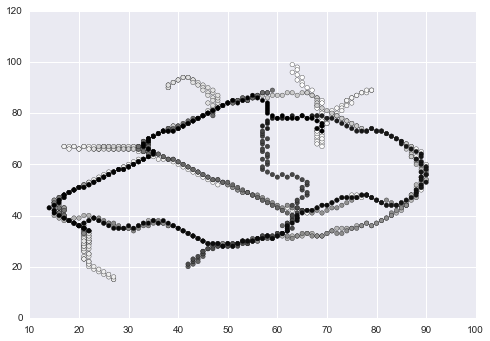

In [32]:
plt.scatter(guest_df["X"],guest_df["Y"],c=guest_df["time"])

At what time did he arrive?

In [33]:
guest_df["time"].min()

Timestamp('2014-06-06 08:25:55')

At what time did he leave?

In [34]:
guest_df["time"].max()

Timestamp('2014-06-06 20:11:59')

So how long did he stay?

In [35]:
guest_df["time"].max() - guest_df["time"].min()

Timedelta('0 days 11:46:04')

## 4. Single time frame

Where were the guests between 12:00 and 12:05 ?

In [36]:
noon_dates = (df["time"] < '2014-06-06 12:05:00') & (df["time"] >= '2014-06-06 12:00:00')

In [37]:
noon_df = df.loc[noon_dates]

In [38]:
noon_df.shape

(43356, 6)

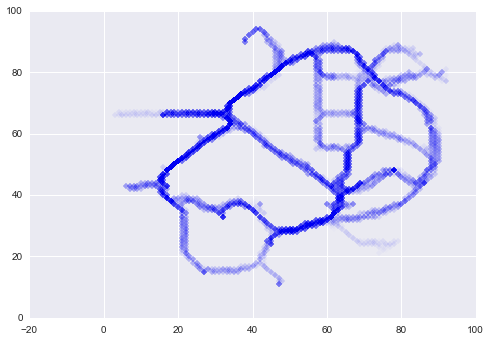

In [39]:
plt.scatter(noon_df["X"], noon_df["Y"], alpha=0.01, marker="o", s=30)

lets add some jitter

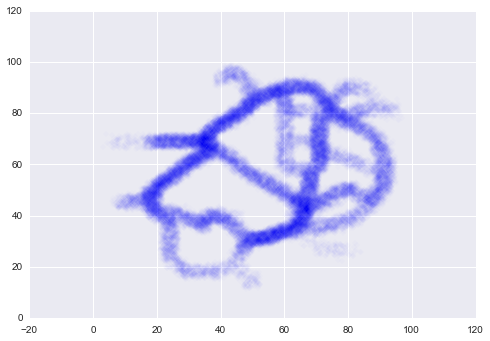

In [40]:
plt.scatter(noon_df["X"] +5*np.random.random(len(noon_df))
           ,noon_df["Y"]+5*np.random.random(len(noon_df)),
            alpha=0.01, marker="o", s=30)

## 5. Time analysis

Now lets try to ask some simple questions about time data

- At what time do guests arrive?
- At what time do they leave?
- How long they stay?
- How does park ocupacy vary during the day?

To answer the first questions we needd to transform the data

In [41]:
grouped_times = df.groupby("id")["time"]

In [42]:
arrivals = grouped_times.min()

In [43]:
departures = grouped_times.max()

In [44]:
duration = departures - arrivals

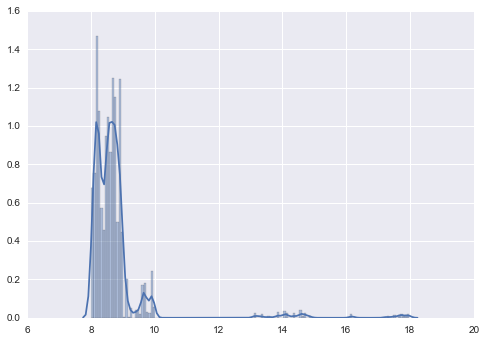

In [45]:
sns.distplot(arrivals.dt.hour+arrivals.dt.minute/60)

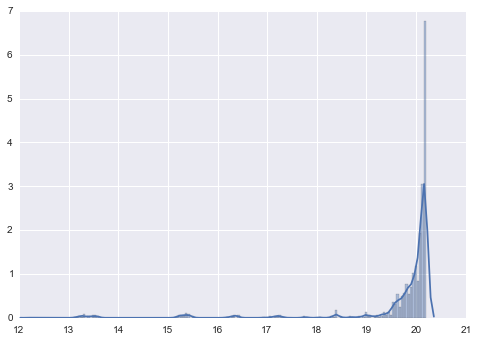

In [46]:
sns.distplot(departures.dt.hour+departures.dt.minute/60)

In [47]:
h_duration = duration.dt.seconds/60/60

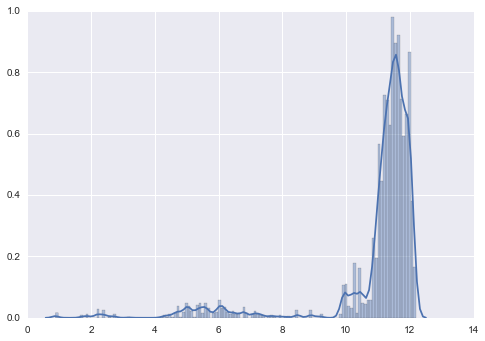

In [48]:
sns.distplot(h_duration)

Now for the question of park occupacy, we need to group the dataframe by time

In [49]:
time_groups = df.groupby(df.time.dt.hour)

In [50]:
occupancy = time_groups["id"].aggregate(lambda x:len(np.unique(x)))

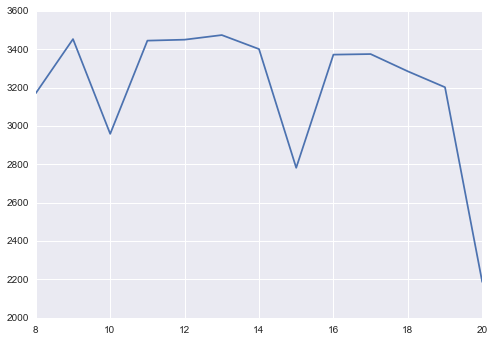

In [51]:
occupancy.plot()

## Questions

What places did the people who stayed for less than 4 hours visit?

What is the distribution of total traveled distance of park visitors?

What is the mean speed of the park visitors?

Who are the visitors who walked more?

At what times are *check-in* samples recorded?